# Chapter 9: Classification and Regression Trees

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary


## Figure 9.7

In [2]:
mower_df = pd.read_csv('RidingMowers.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'RidingMowers.csv'

In [ ]:
mower_df 

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


Classes: Nonowner, Owner


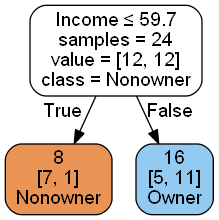

In [ ]:
pip install pydotplus
conda intall graphviz

classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.8
Grow tree fully

Classes: Nonowner, Owner


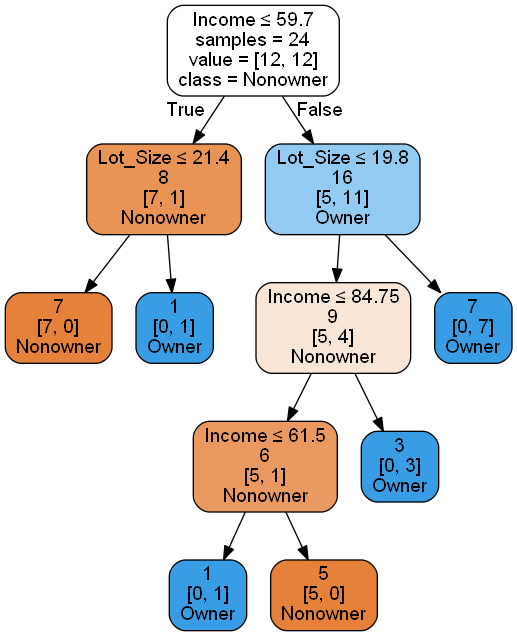

In [ ]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Figure 9.10

In [ ]:
bank_df = pd.read_csv('UniversalBank.csv')

In [ ]:
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


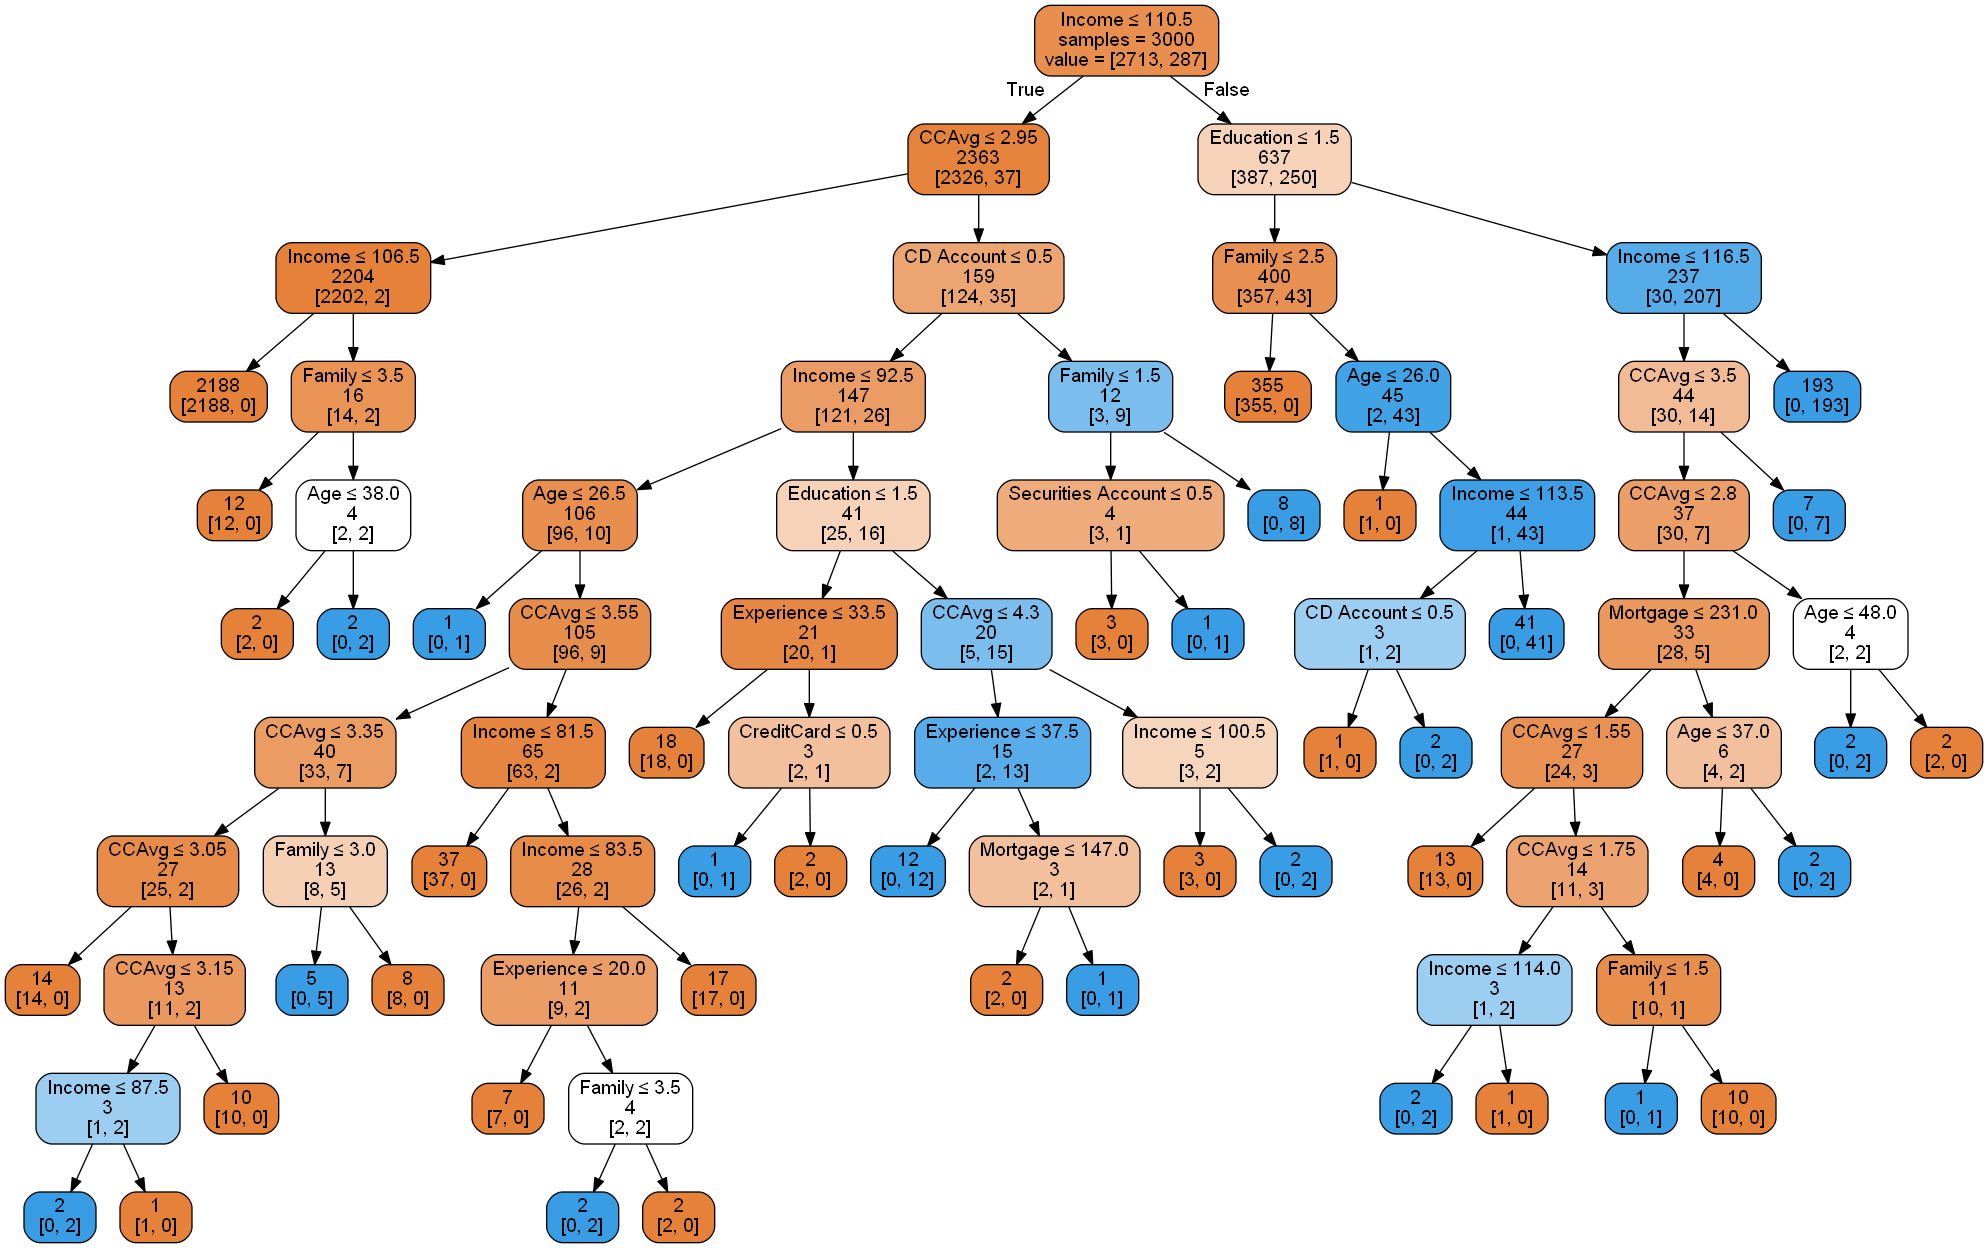

In [ ]:

bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

## Table 9.3
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [ ]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9805)

       Prediction
Actual    0    1
     0 1794   13
     1   26  167


## Figure 9.12

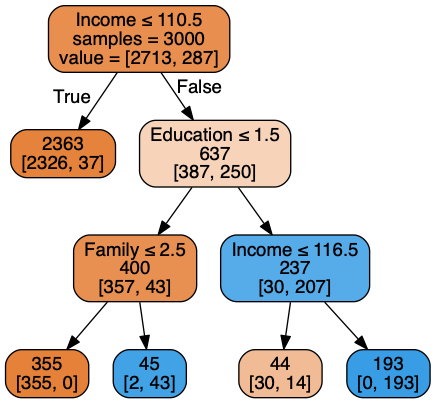

In [ ]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

## Table 9.5

In [ ]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## Grid search

## Table 9.6

In [ ]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.988
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}
Improved score:  0.9883333333333333
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


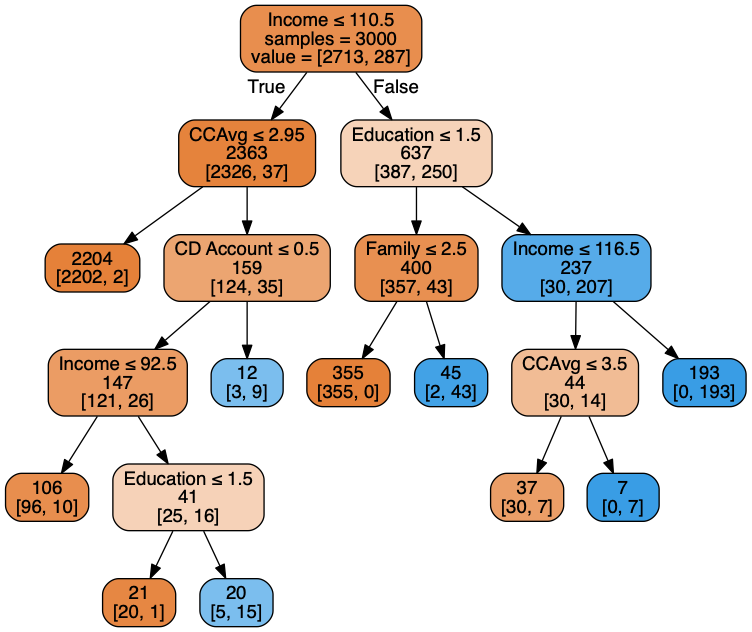

In [ ]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [ ]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual    0    1
     0 2703   10
     1   20  267
Confusion Matrix (Accuracy 0.9825)

       Prediction
Actual    0    1
     0 1793   14
     1   21  172


## Figure 9.16

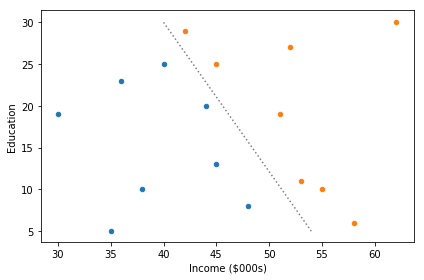

In [ ]:
fakeScatter = pd.DataFrame([
    (30, 19, 1), (35, 5, 1), (40, 25, 1), (45, 13, 1), 
    (38, 10, 1), (36, 23, 1), (48, 8, 1), (44, 20, 1), (50, 12),
    (51, 19, 0), (62, 30, 0), (42, 29, 0), (45, 25, 0), 
    (55, 10, 0), (52, 27, 0), (58, 6, 0), (53, 11, 0), 
], columns=['x', 'y', 'category'])
ax = fakeScatter.loc[fakeScatter.category==1,:].plot.scatter(x='x', y='y', color='C0')
fakeScatter.loc[fakeScatter.category==0,:].plot.scatter(x='x', y='y', ax=ax, color='C1')
plt.plot((40, 54), (30, 5), ':', color='grey')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Education')

plt.tight_layout()
plt.show()

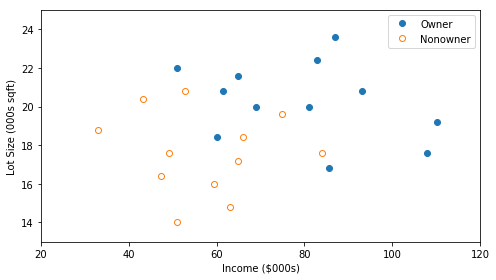

In [ ]:
def basePlot(ax):
    mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Owner", "Nonowner"]);
    ax.set_xlim(20, 120)
    ax.set_ylim(13, 25)
    ax.set_xlabel('Income ($000s)')
    ax.set_ylabel('Lot Size (000s sqft)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

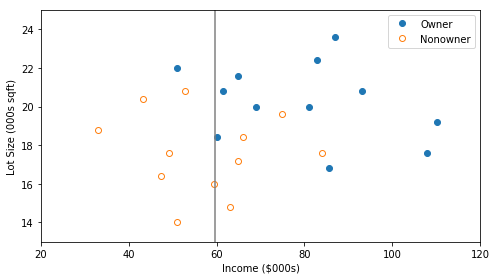

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
ax.plot((x0, x0), (25, 13), color='grey')
plt.tight_layout()
plt.show()

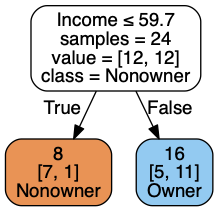

In [ ]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

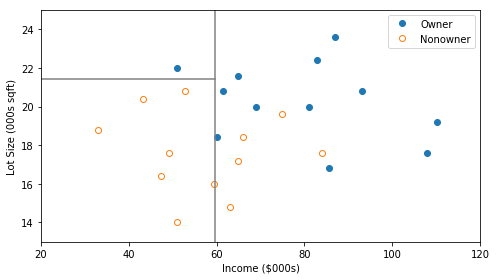

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
plt.tight_layout()
plt.show()

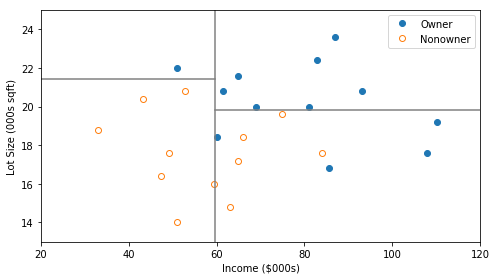

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
plt.tight_layout()
plt.show()

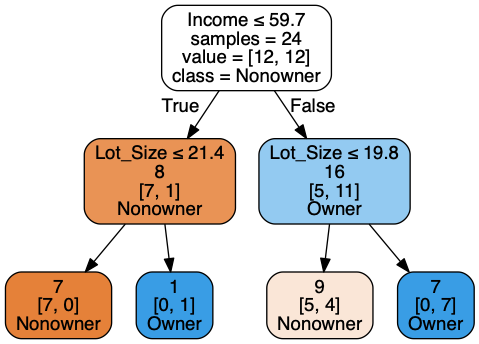

In [ ]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

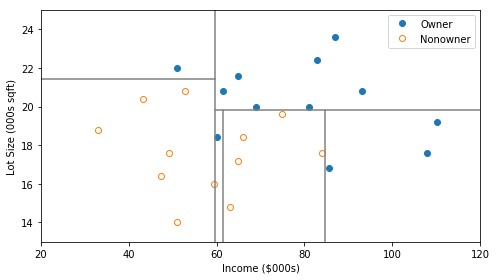

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
x3 = 84.75
x4 = 61.5
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
ax.plot((x3, x3), (13, y2), color='grey')
ax.plot((x4, x4), (13, y2), color='grey')
plt.tight_layout()
plt.show()

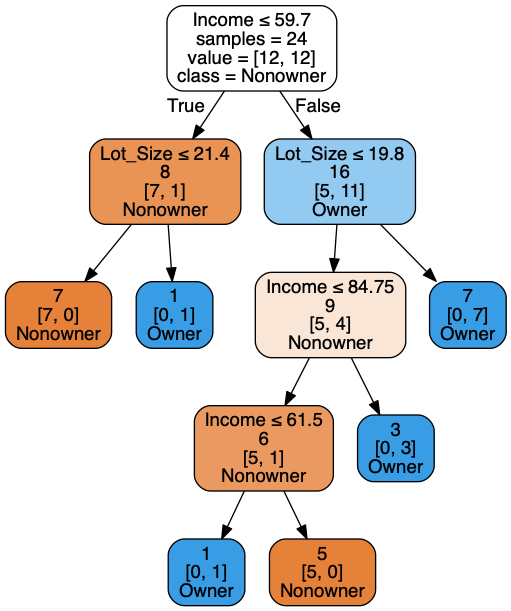

In [ ]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Information about full decision tree

Number of nodes 85


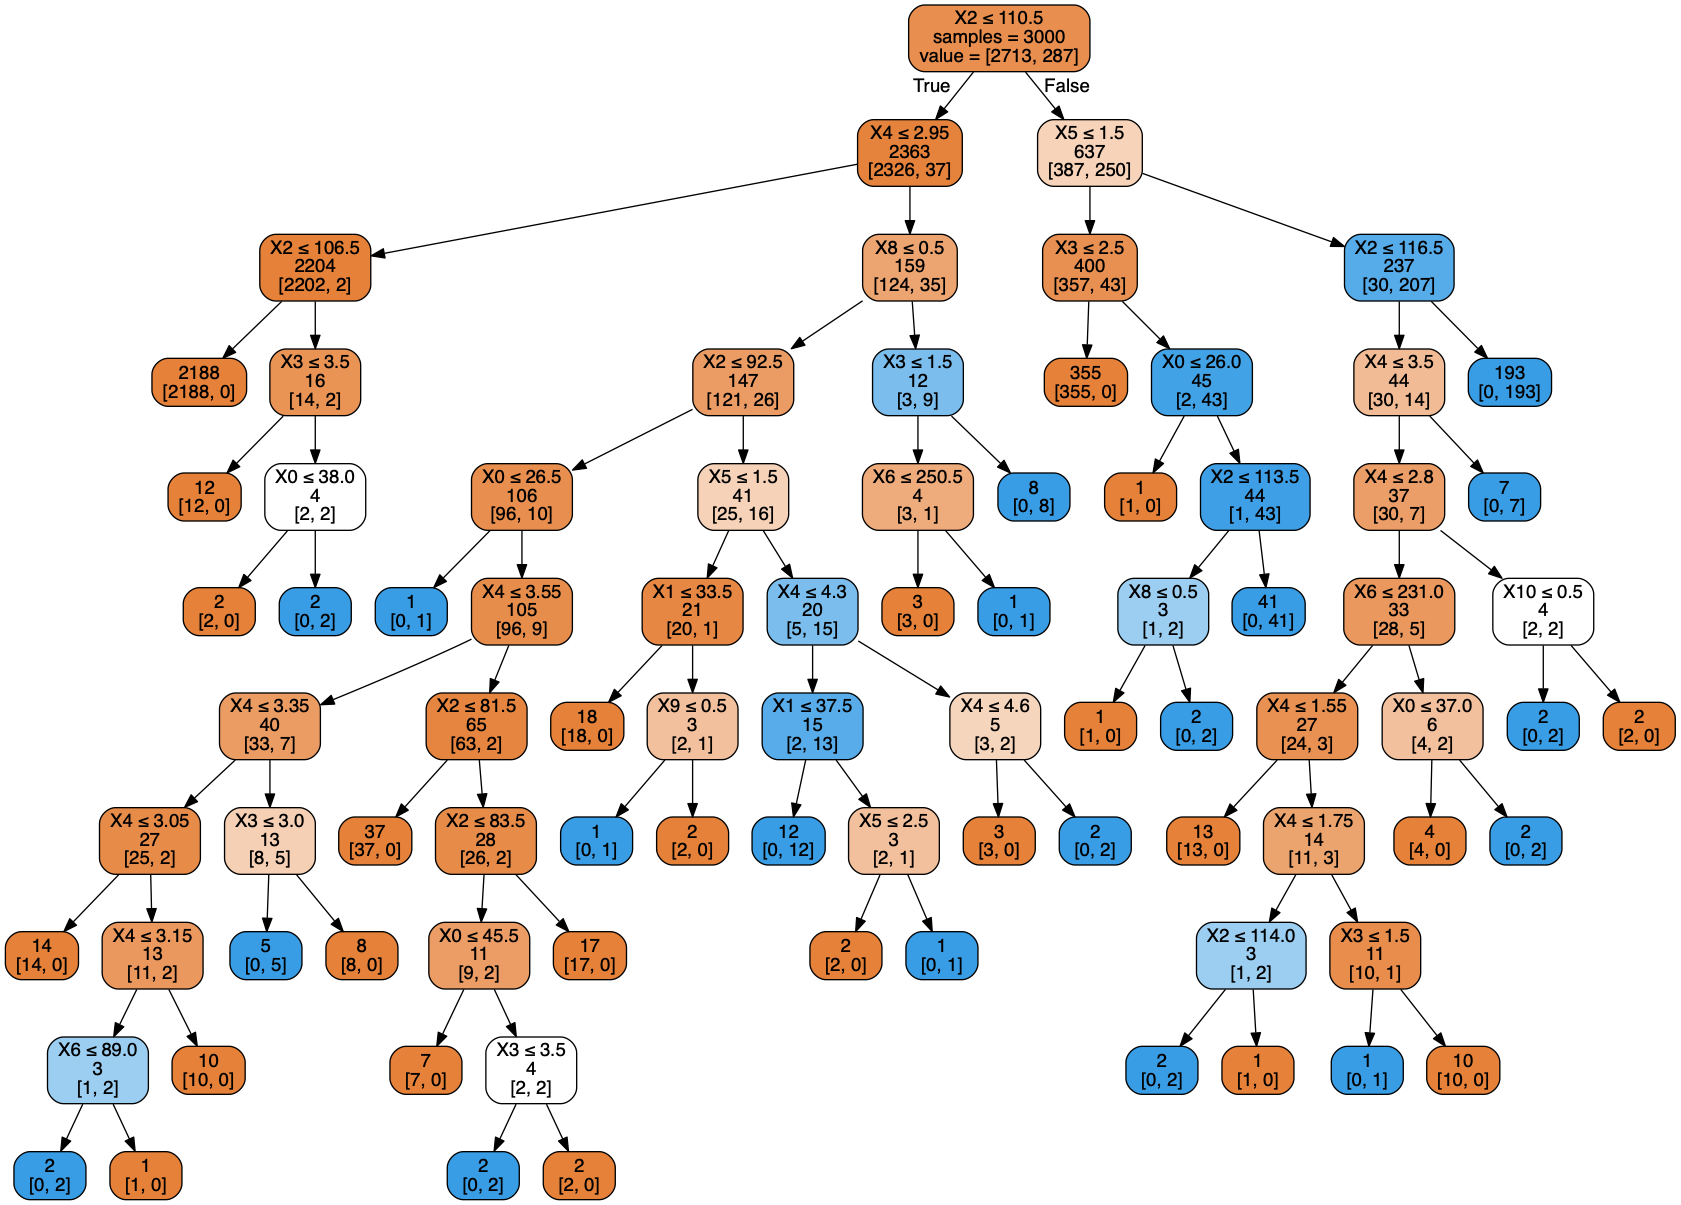

In [ ]:
tree = fullClassTree
print('Number of nodes', tree.tree_.node_count)

In [ ]:
estimator = tree
# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold
value = estimator.tree_.value


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

from collections import Counter
nodeClassCounter = Counter()
terminal_leaves = 0
for i in range(n_nodes):
    if is_leaves[i]:
        terminal_leaves = terminal_leaves + 1
        nodeClassCounter.update([np.argmax(value[i][0])])
print()
print('Number of terminal leaves', terminal_leaves)
print(nodeClassCounter)


Number of terminal leaves 43
Counter({0: 24, 1: 19})


## Regression Trees : Table 9.7 and Figure 9.14

In [ ]:
toyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


In [ ]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


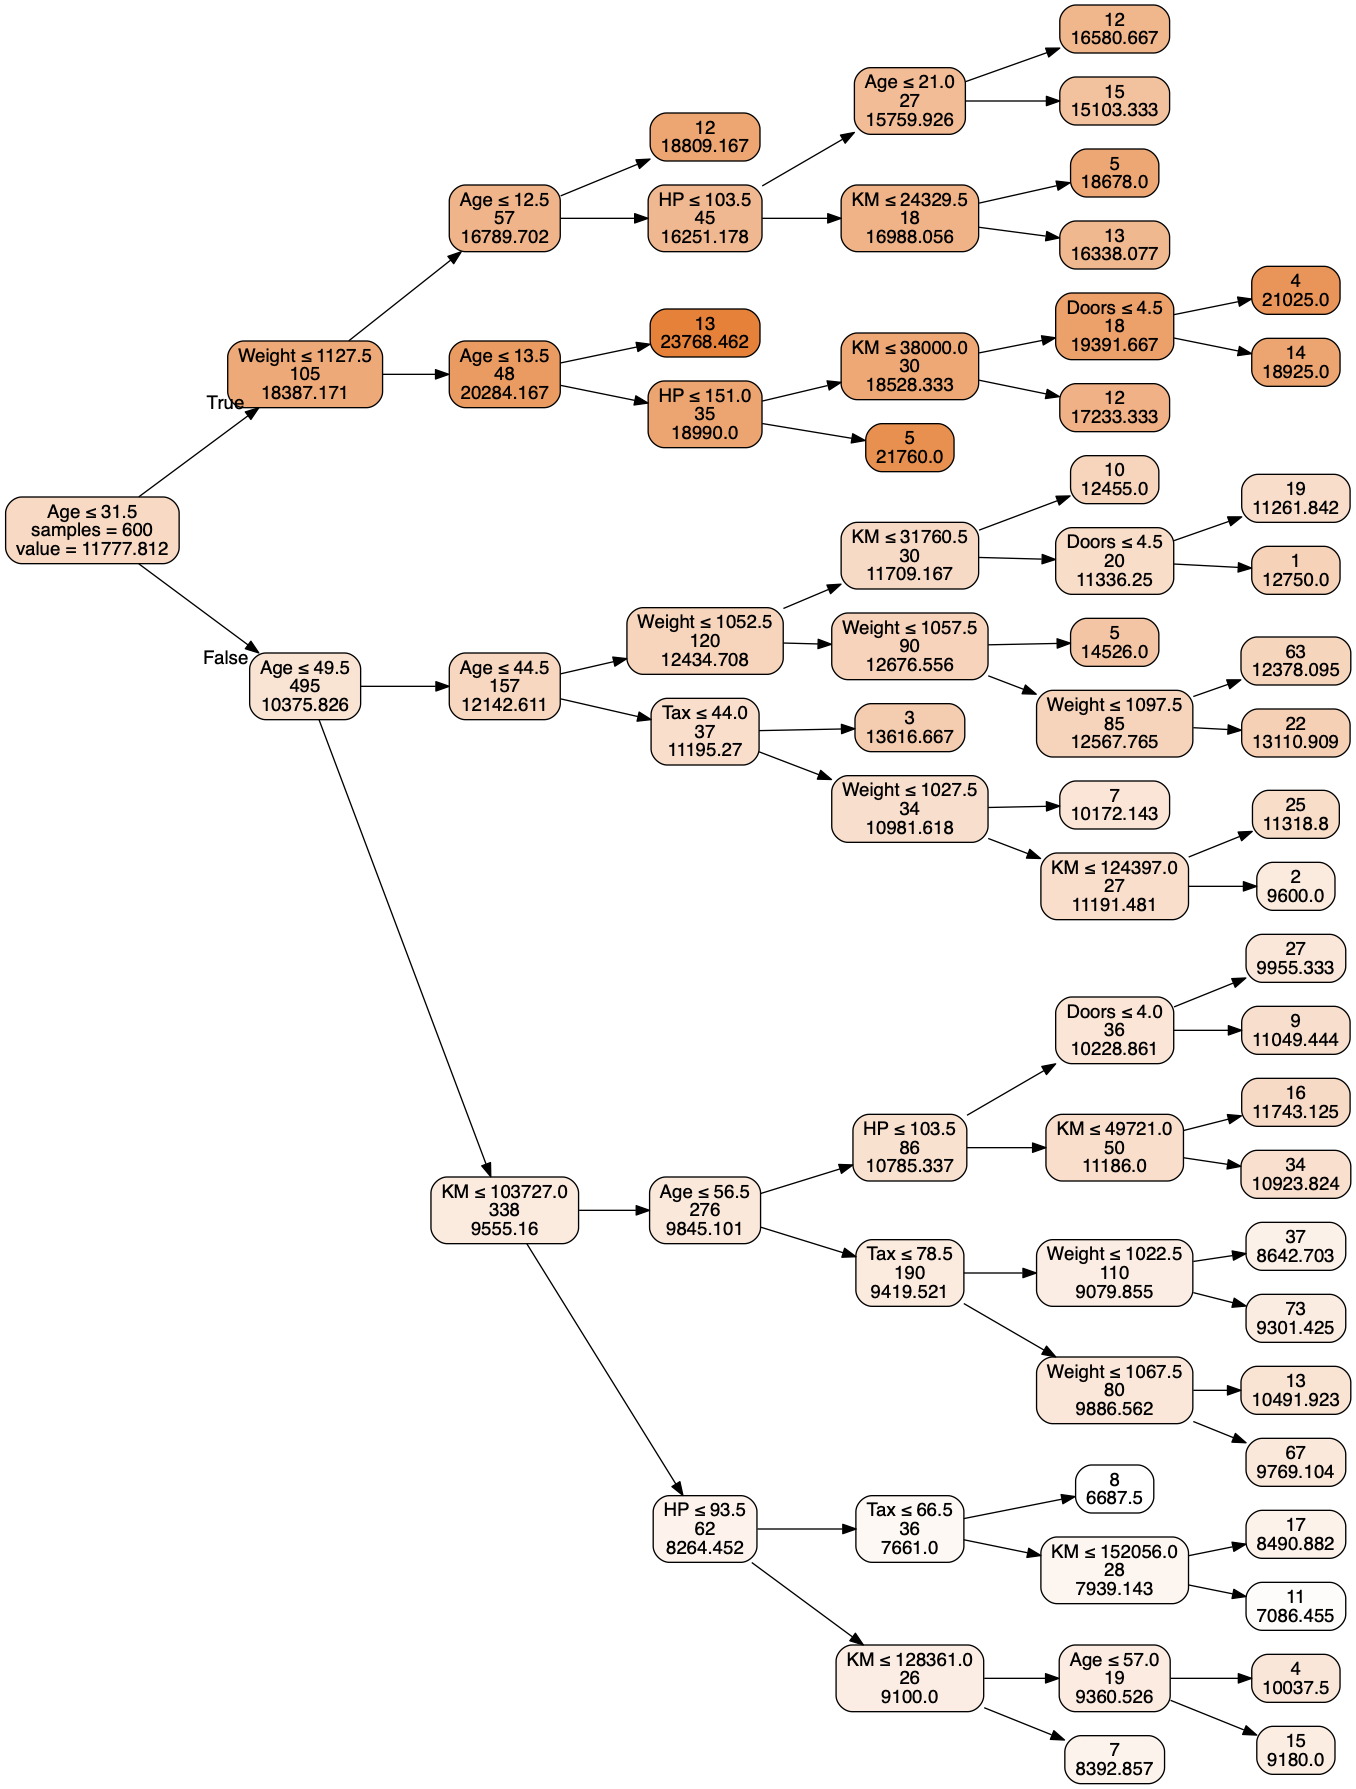

In [ ]:
plotDecisionTree(regTree, feature_names=train_X.columns)
plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)

## Figure 9.15 (no longer used)

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

letr_recog_df = pd.read_csv('letter-recognition.csv')
# letr_recog_df = letr_recog_df.drop(columns=['lettr'])

X = letr_recog_df.drop(columns=['lettr']) # lettr is the Class
y = letr_recog_df['lettr']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

Variable importance plot

   feature  importance       std
3    high     0.021030  0.003193
0    x-box    0.022601  0.003992
2    width    0.023628  0.005676
1    y-box    0.025367  0.003209
4    onpix    0.027630  0.004678
5    x-bar    0.051176  0.010419
15   yegvx    0.054070  0.008135
6    y-bar    0.068501  0.012756
9    xybar    0.072930  0.011403
13   xegvy    0.073054  0.012762
10   x2ybr    0.081954  0.014005
7    x2bar    0.082489  0.012538
11   xy2br    0.085203  0.011245
8    y2bar    0.093414  0.012216
14   y-ege    0.099507  0.013161
12   x-ege    0.117446  0.015939


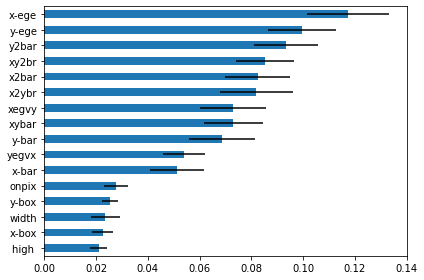

In [5]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Confusion matrix and metrics

In [6]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9601)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
     0 311   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     1   0 306   0   0   2   0   1   1   0   0   0   0   0   1   0   0   0   0   0   0   2   4   0   2   0   0
     2   0   0 282   0   5   0   7   0   0   0   0   0   0   0   4   0   2   0   0   0   0   0   0   0   0   0
     3   1   2   0 331   0   0   0   1   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0
     4   0   0   1   0 291   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   1
     5   0   5   0   2   1 302   0   1   0   0   0   0   0   1   0   3   0   0   0   9   0   0   1   1   1   0
     6   0   4   2   2   2   0 305   1   0   0   0   0   0   0   0   0   2   0   0   0   0   1   0   0   0   0
     7   1   2   1   8   0   0   0 273   0   0  10   0   2

## Table 9.5

In [7]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9111)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
     0 300   0   1   0   0   0   1   0   1   1   0   1   0   1   0   0   3   1   0   0   1   0   0   0   0   0
     1   0 289   1   3   2   0   1   1   0   0   0   0   1   2   0   3   0  10   2   1   1   1   0   1   0   0
     2   0   0 264   0  14   0   7   0   0   0   1   0   0   0   7   0   2   1   1   1   2   0   0   0   0   0
     3   1   7   0 308   0   1   0   5   0   0   2   0   1   1   3   0   0   5   1   1   0   0   0   1   0   0
     4   0   0   2   0 268   2   8   1   0   0   1   0   0   0   0   0   3   0   5   2   0   0   0   3   0   2
     5   0   7   0   1   1 295   0   1   2   1   1   0   0   1   0   6   0   0   0   7   0   1   1   0   2   0
     6   0   3   6   5   9   2 277   6   0   0   1   0   2   0   1   0   4   1   0   0   0   1   1   0   0   0
     7   1   7   0   7   0   0   0 258   0   3   8   2   2